# Importing the libaries

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Data Collection and Processing

In [124]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [125]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [126]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [127]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# checking for null values

In [128]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# visualization of all columns

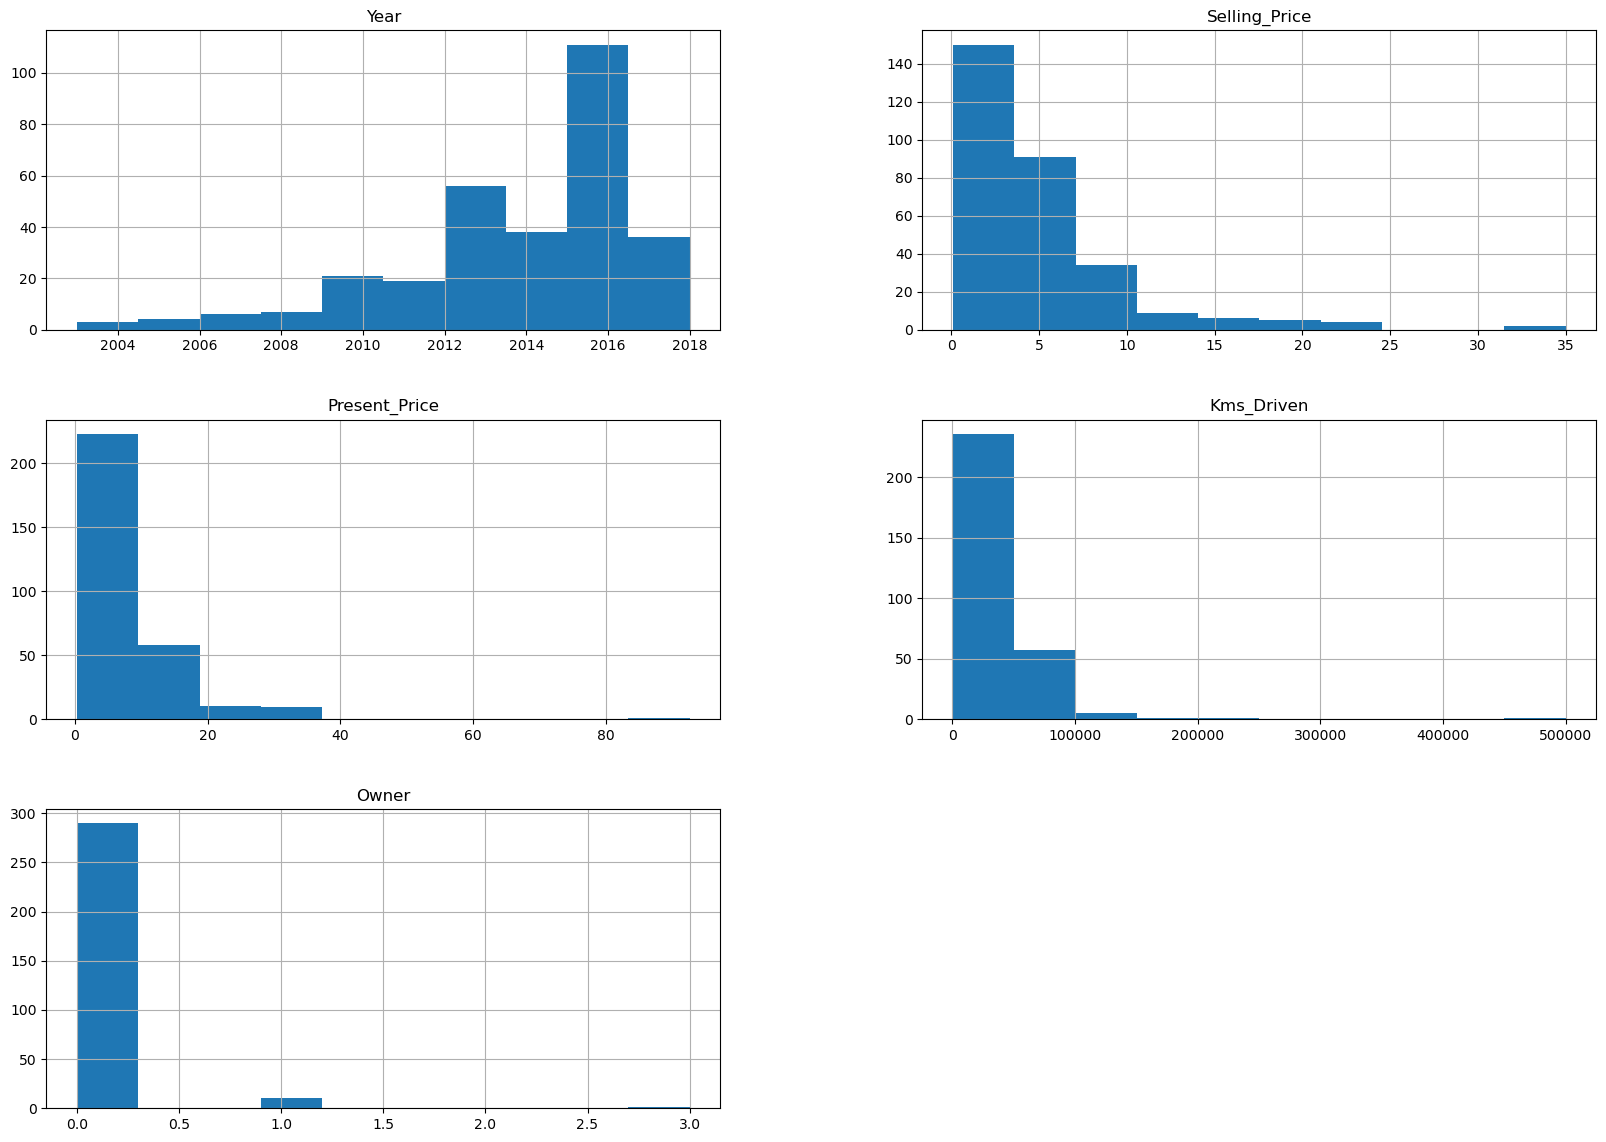

In [129]:
car_dataset.hist(figsize=(20,14))
plt.show()

In [130]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data

In [131]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [132]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# visualization

In [133]:
car_dataset['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [134]:
car_dataset['Present_Price'].describe()

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

In [135]:
num_features = ['Year' , 'Selling_Price' , 'Present_Price' , 'Kms_Driven' ]
cat_features = ['Car_Name', 'Fuel_Type' ,'Seller_Type' , 'Transmission' ]

In [136]:
# Average Selling price
print(f'Selling Price Mean : {car_dataset.Selling_Price.mean():.2f}' )
print(f'Selling Price Median : {car_dataset.Selling_Price.median():.2f}' )

Selling Price Mean : 4.66
Selling Price Median : 3.60


In [137]:
# Average Present Price
print(f'Present Price Mean : {car_dataset.Present_Price.mean():.2f}' )
print(f'Present Price Median : {car_dataset.Present_Price.median():.2f}' )

Present Price Mean : 7.63
Present Price Median : 6.40


In [138]:
# Average km driven  
print(f'Kms Driven Mean : {car_dataset.Kms_Driven.mean():.2f}' )
print(f'Kms Driven Price Median : {car_dataset.Kms_Driven.median():.2f}' )

Kms Driven Mean : 36947.21
Kms Driven Price Median : 32000.00


# present price visualization

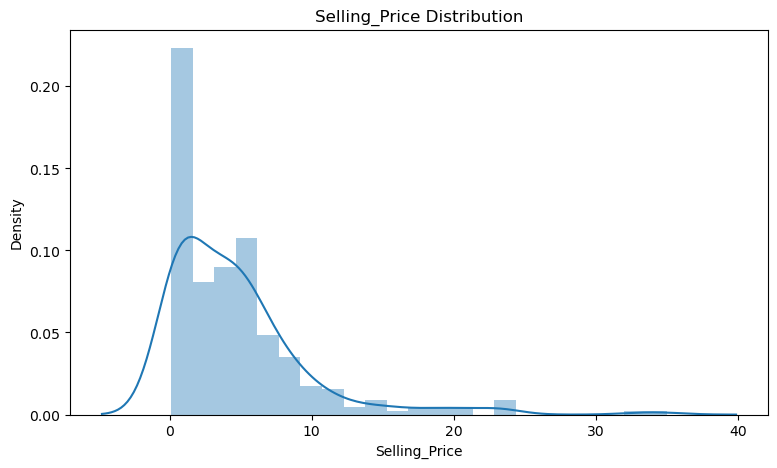

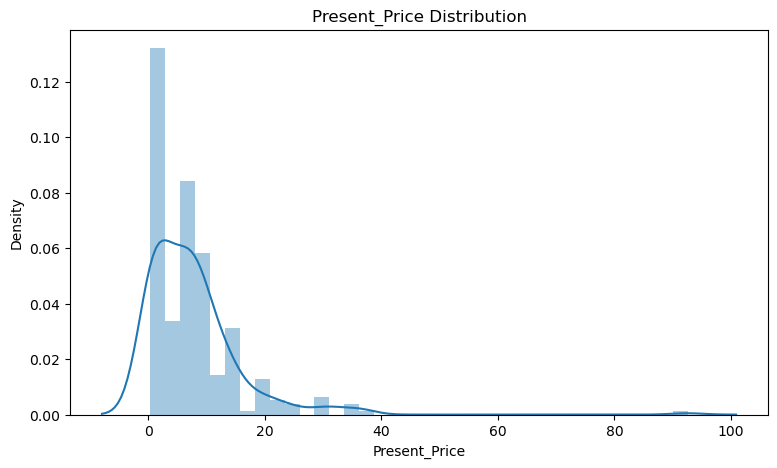

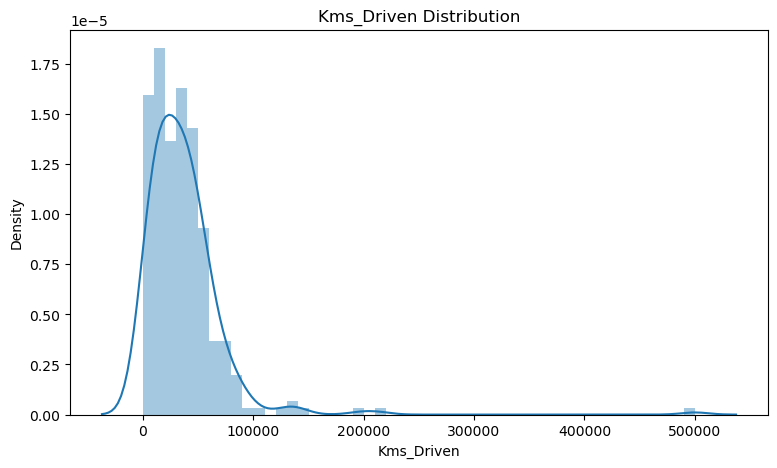

In [139]:
ls = ['Selling_Price' , 'Present_Price' , 'Kms_Driven']
for i in ls:
    plt.figure(dpi=100 ,figsize=(9 ,5))
    plt.title(f'{i} Distribution')
    sns.distplot(x=car_dataset[i])
    plt.xlabel(i)
    plt.show()

# present price visualization

In [140]:
df1 = car_dataset.groupby('Seller_Type').agg({'Selling_Price':'mean','Present_Price':'mean'})
df1['Percentage_Price_Drop'] = df1['Selling_Price']*100 / df1['Present_Price']
df1

,Selling_Price,Present_Price,Percentage_Price_Drop
Seller_Type,,,
0,6.721692,10.886308,61.744464
1,0.870943,1.635283,53.259490


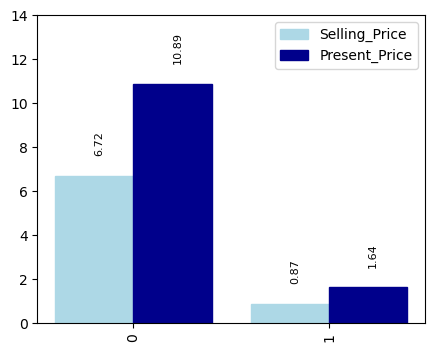

In [141]:
x = np.arange(0 ,2)-.2 ; w = .4
plt.figure(dpi=100 ,figsize=(5 ,4))
for i ,color in zip(['Selling_Price','Present_Price'] , ['lightblue','darkblue']):
    bars = plt.bar(x,df1[i] ,width=w , align='center' ,label=i)
    for bar in bars:
        bar.set_color(color)
        plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()+1 , s=f'{bar.get_height():.2f}' ,fontdict={'size':8}  ,rotation=90)
    x = x+w
plt.xticks( np.arange(2) ,df1.index ,rotation=90)
plt.yticks(np.arange(0 ,16 ,2))
plt.legend()
plt.show()

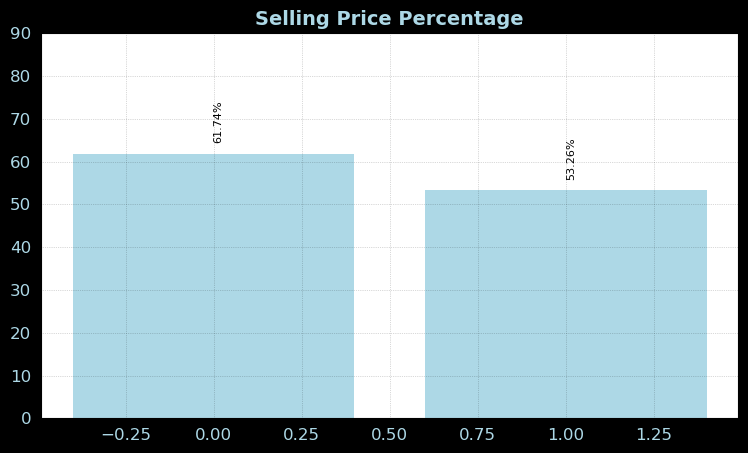

In [142]:
# plot to show selller_type affects selling price 
# eg: if preice of a car is 100 then Dealer will sell it upto 60 - 62 but indivisual/normal men will sell it in less than 58
plt.figure(dpi=100,facecolor='Black' , figsize=(9 ,5))
plt.title('Selling Price Percentage' ,color='lightblue' ,size=14 , weight='heavy')
bars = plt.bar(df1.index , df1.Percentage_Price_Drop ,color='lightblue')
for bar in bars:
     plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()+3 , s=f'{bar.get_height():.2f}%' ,fontdict={'size':8}  ,rotation=90)
plt.xticks(color='lightblue'  , size=12)
plt.yticks(np.arange(0,91,10), color='lightblue',size=12)
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

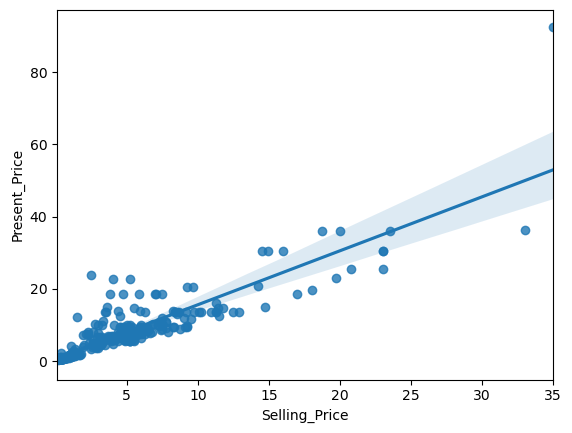

In [143]:
sns.regplot('Selling_Price','Present_Price',data=car_dataset)

# present price its seem to increse compared to selling price

# year visualization

In [144]:
df1 = car_dataset.groupby('Year').agg({'Selling_Price':'mean','Present_Price':'mean'})
df1

,Selling_Price,Present_Price
Year,,
2003,1.300000,5.130000
2004,1.500000,12.350000
2005,2.487500,9.485000
2006,1.437500,9.057500
2007,0.160000,0.665000
2008,1.002857,4.759571
2009,2.816667,10.601667
2010,5.262667,14.330667
2011,2.375263,5.148053


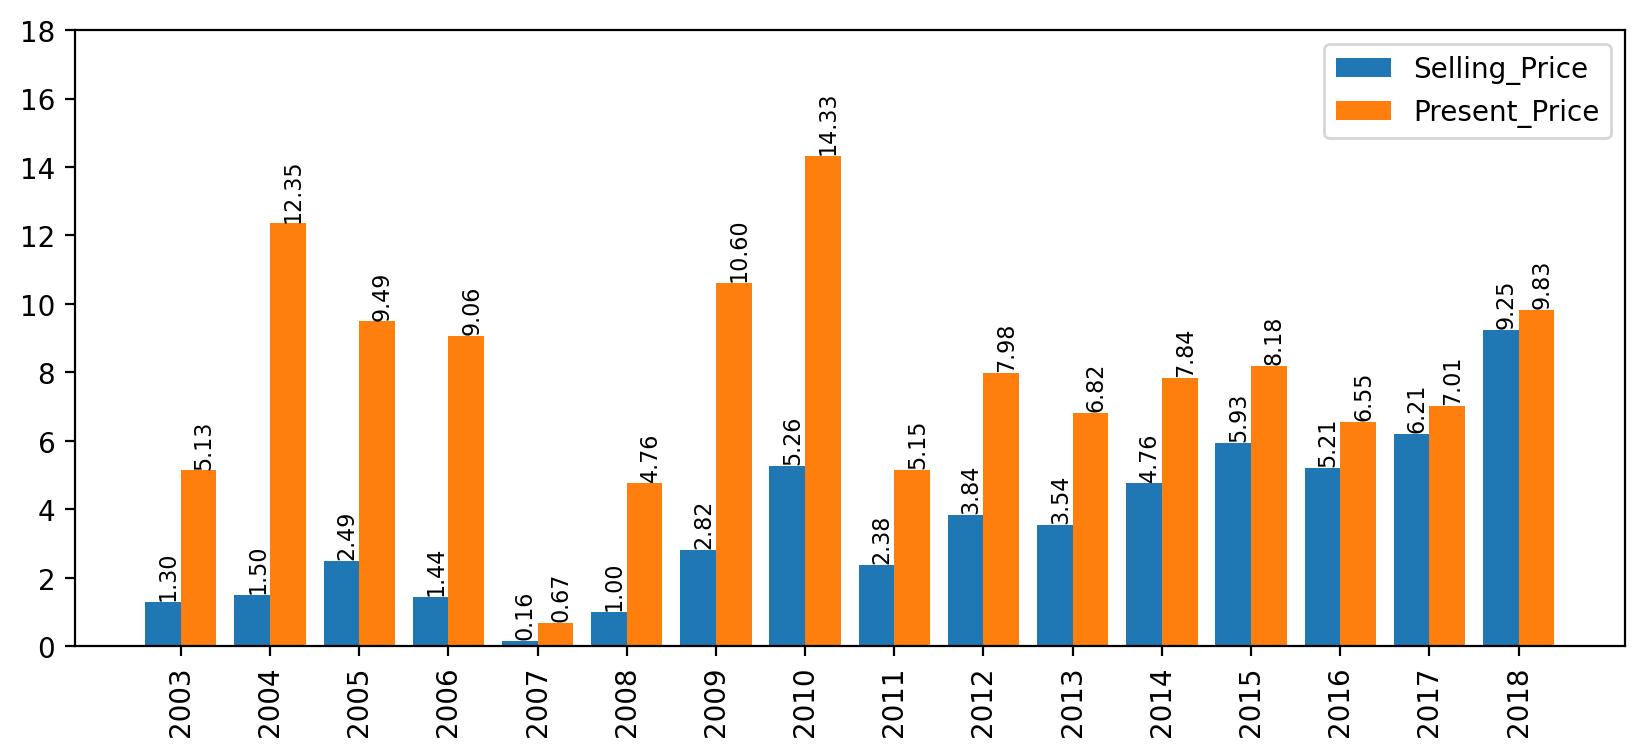

In [145]:
x = np.arange(0 ,16)-.2
plt.figure(dpi=200 ,figsize=(10 ,4))
for i in ['Selling_Price','Present_Price']:
    bars = plt.bar(x,df1[i] ,width=.4 , align='center' ,label=i)
    for bar in bars:
        plt.text(bar.get_x()+bar.get_width()/3 , bar.get_height()+.2 , s=f'{bar.get_height():.2f}' ,fontdict={'size':8}  ,rotation=90)
    x = x+.4
plt.xticks(np.arange(0 ,16) ,df1.index , rotation=90)
plt.yticks(np.arange(0 ,20 ,2))
plt.legend()
plt.show()

# fuel type visualizaation

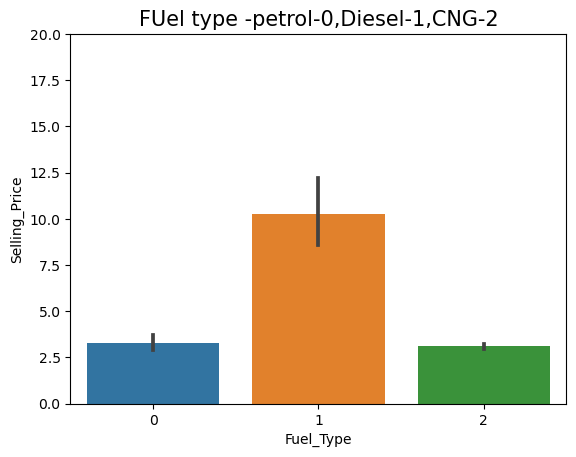

In [146]:
var = 'Fuel_Type'
data = pd.concat([car_dataset['Selling_Price'],car_dataset[var]], axis=1)
fig = sns.barplot(x=var, y="Selling_Price", data=data)
plt.title("FUel type -petrol-0,Diesel-1,CNG-2",fontsize=15)
fig.axis(ymin=0, ymax=20);

# Lets See How Owner-Ship Affects Selling Price

In [147]:
df1 = car_dataset.groupby('Owner').agg({'Owner':'count','Selling_Price':'mean'})
df1['Percentage'] = df1.Selling_Price / df1.Owner
df1

,Owner,Selling_Price,Percentage
Owner,,,
0,290,4.761552,0.016419
1,10,1.970000,0.197000
3,1,2.500000,2.500000


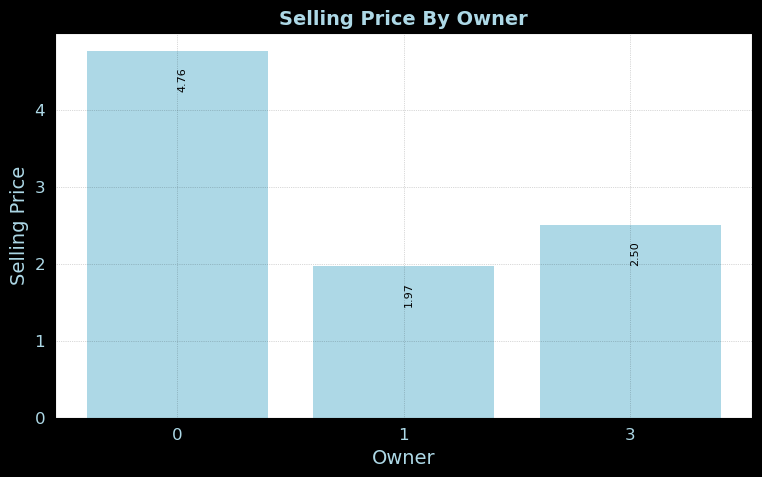

In [148]:
# plot to show how owner ship affects selling price 
plt.figure(dpi=100,facecolor='Black' , figsize=(9 ,5))
plt.title('Selling Price By Owner' ,color='lightblue' ,size=14 , weight='heavy')
bars = plt.bar(list(map(str ,df1.index)) , df1.Selling_Price ,color='lightblue')
for bar in bars:
     plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()-.5 , s=f'{bar.get_height():.2f}' ,fontdict={'size':8}  ,rotation=90)
plt.xticks(np.arange(0 ,3),list(map(str ,df1.index)) ,color='lightblue'  , size=12)
plt.yticks(color='lightblue',size=12)
plt.ylabel('Selling Price',color='lightblue',size=14)
plt.xlabel('Owner',color='lightblue',size=14)
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()

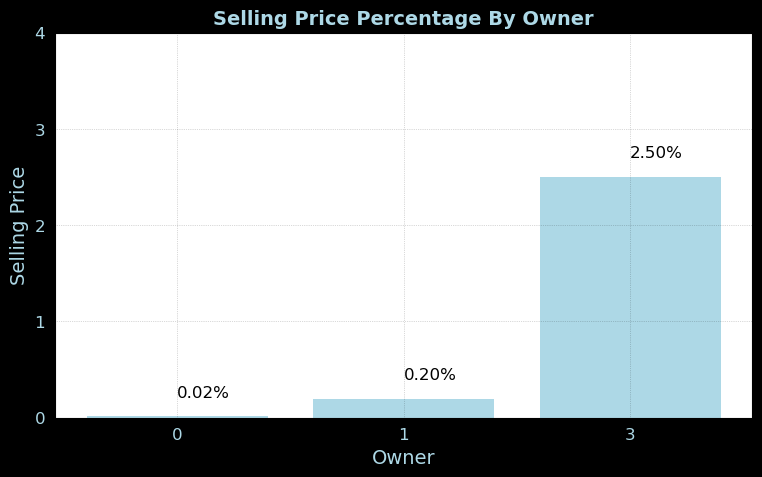

In [149]:
# plot to show how owner ship affects selling price 
plt.figure(dpi=100,facecolor='Black' , figsize=(9 ,5))
plt.title('Selling Price Percentage By Owner' ,color='lightblue' ,size=14 , weight='heavy')
bars = plt.bar(list(map(str ,df1.index)) , df1.Percentage ,color='lightblue')
for bar in bars:
     plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()+.2 , s=f'{bar.get_height():.2f}%' ,fontdict={'size':12})
plt.xticks(np.arange(0 ,3),list(map(str ,df1.index)) ,color='lightblue'  , size=12)
plt.yticks(np.arange(0 ,5),color='lightblue',size=12)
plt.ylabel('Selling Price',color='lightblue',size=14)
plt.xlabel('Owner',color='lightblue',size=14)
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()

In [150]:
#corelation
car_dataset.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


# A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates

<AxesSubplot:>

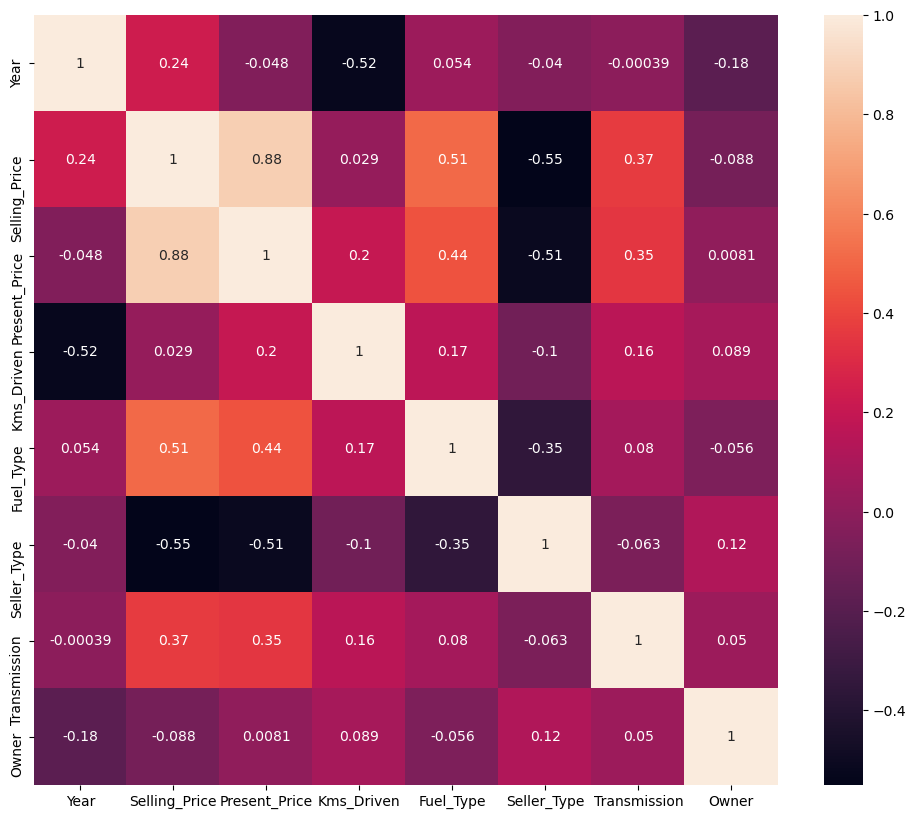

In [151]:
plt.figure(figsize = (12,10))
sns.heatmap(car_dataset.corr(), annot =True)

# Splitting the data and Target

In [152]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [153]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [154]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Training and Test data

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Model Training( we have test on both training data and test data)

# 1. Linear Regression

In [156]:
reg = LinearRegression()
reg.fit(X_train,Y_train)
y_pred = reg.predict(X_test)
Acc_reg = reg.score(X_train, Y_train)
acc_reg = reg.score(X_test, Y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_reg*100))
print ('Test Accuracy : {:.2f}%'.format(acc_reg*100))
print('Mean squared error: %.2f'% mean_squared_error(Y_test, y_pred))
print('Variance Score: %.2f'% r2_score(Y_test, y_pred))

Train Accuracy : 87.99%
Test Accuracy : 83.66%
Mean squared error: 2.15
Variance Score: 0.84


# 2. Decisiontree Regression

In [157]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
pred_dtr = dtr.predict(X_test)
Acc_dtr = dtr.score(X_train, Y_train)
acc_dtr = dtr.score(X_test, Y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_dtr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_dtr*100))
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred_dtr))
print('Variance Score: %.2f'% r2_score(Y_test, pred_dtr))

Train Accuracy : 100.00%
Test Accuracy : 94.89%
Mean squared error: 0.67
Variance Score: 0.95


# 3.randomforestregressor

In [158]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
pred_rfr = rfr.predict(X_test)
Acc_rfr = rfr.score(X_train, Y_train)
acc_rfr = rfr.score(X_test, Y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_rfr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_rfr*100))
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred_rfr))
print('Variance Score: %.2f'% r2_score(Y_test, pred_rfr))

Train Accuracy : 98.70%
Test Accuracy : 98.02%
Mean squared error: 0.26
Variance Score: 0.98


# 4 .svc

In [159]:

from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train,Y_train)
pred_svr = model_svr.predict(X_test)
Acc_svr = model_svr.score(X_train, Y_train)
acc_svr = model_svr.score(X_test, Y_test)
print ('Train Accuracy :{:.2f}%'.format(Acc_svr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_svr*100))
print('Mean squared error: %.2f'% mean_squared_error(Y_test, pred_svr))
print('Variance Score: %.2f'% r2_score(Y_test, pred_svr))

Train Accuracy :-7.76%
Test Accuracy : 10.85%
Mean squared error: 11.73
Variance Score: 0.11


# report of differnt model

In [160]:
output = pd.DataFrame({"Model":['Linear Regression','SVR','Decision Tree Regressor',
                               'Random Forest Regressor'],
                       "Accuracy":[acc_reg, acc_svr, acc_dtr, acc_rfr]})
output

,Model,Accuracy
0,Linear Regression,0.836577
1,SVR,0.108541
2,Decision Tree Regressor,0.948942
3,Random Forest Regressor,0.980233


# fetching error table

In [161]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, y_pred)*100)
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, y_pred)*100)
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred))*100)
print('R Squared Error          : ', metrics.r2_score(Y_test, y_pred)*100)


		Error Table
Mean Absolute Error      :  115.1638215662075
Mean Squared  Error      :  215.0129918985791
Root Mean Squared  Error :  146.63321311987235
R Squared Error          :  83.65766715025408


In [162]:
print(y_pred)

[10.32892855  0.77165673  4.26482324  4.78985002  9.88701568  4.24823193
  6.92536953  7.29321065  0.21950514  5.18527582  6.23823964  6.07761019
  2.1716932   7.77611973  1.89987958  1.79635895  2.10001123  1.91953211
  9.24977006  4.25291486  1.569912    9.04949049  1.52561157  9.65418587
  0.89631315  7.99187626  1.59929505 -3.17680912  4.24653988  2.1257015
  3.49654935]


In [163]:
print(Y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


Text(0, 0.5, 'y_pred')

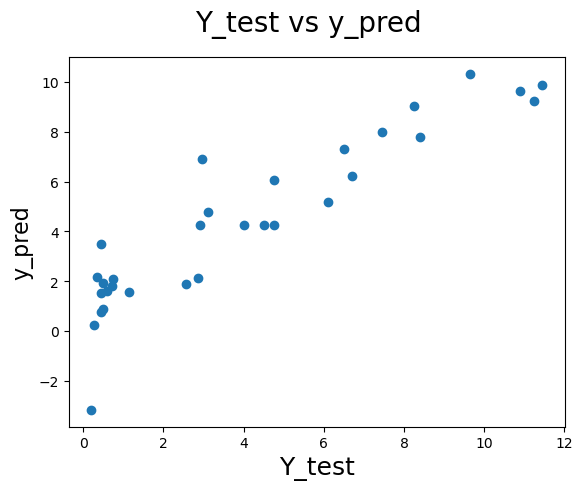

In [164]:
fig = plt.figure()
plt.scatter(Y_test,y_pred)
fig.suptitle('Y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

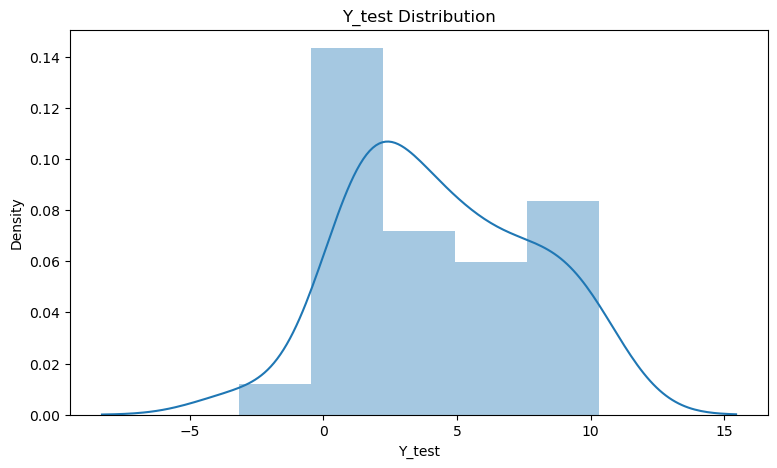

In [165]:
ls = [ 'Y_test' ]
for i in ls:
    plt.figure(dpi=100 ,figsize=(9 ,5))
    plt.title(f'{i} Distribution')
    sns.distplot(x=y_pred)
    plt.xlabel(i)
    plt.show()

# Thank you